,point_id,pts_lon,pts_lat,geometry
0,0,-124.763068,45.543541,POINT (-124.763068 45.543541)
1,1,-124.753068,45.543541,POINT (-124.753068 45.543541)
2,2,-124.743068,45.543541,POINT (-124.743068 45.543541)
3,3,-124.733068,45.543541,POINT (-124.733068 45.543541)
4,4,-124.723068,45.543541,POINT (-124.723068 45.543541)
5,5,-124.713068,45.543541,POINT (-124.713068 45.543541)
6,6,-124.703068,45.543541,POINT (-124.703068 45.543541)
7,7,-124.693068,45.543541,POINT (-124.693068 45.543541)
8,8,-124.683068,45.543541,POINT (-124.683068 45.543541)
9,9,-124.673068,45.543541,POINT (-124.673068 45.543541)


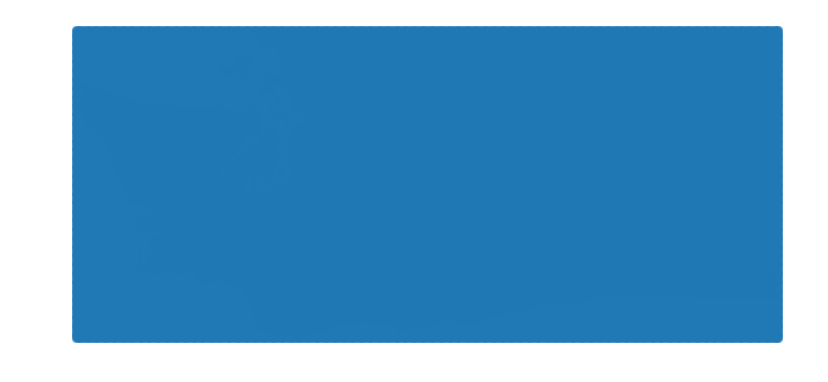

In [21]:
import pandas as pd
import os
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from geopandas import GeoDataFrame
from shapely.geometry import Polygon
import matplotlib as mpl
import json
from requests.exceptions import HTTPError
from urllib.error import URLError


%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

nan = 'np.nan'
bing_api_key = ''
crs = {'init': 'epsg:4326'}

shp = 'Shapes/States/cb_2017_us_state_500k.shp'
us = gpd.read_file(shp)
wa = us[us['STUSPS']=="WA"]
by = .01    #trying a slightly larger grid to keep from crashing everything.


pts_grid = (
    pd.concat([pd.DataFrame({'pts_lon' : np.arange(wa.bounds['minx'], wa.bounds['maxx'], by)})
               , (pd.DataFrame({'pts_lat' : np.arange(wa.bounds['miny'], wa.bounds['maxy'], by)})
                  .pivot(columns = 'pts_lat', values = 'pts_lat'))]
        , axis = 1
             )
    .replace(method='ffill')
    .replace(method='bfill')
    .melt(id_vars=['pts_lon'])
    .drop('variable', 1)
    .rename(columns = {'value' : 'pts_lat'})
    .reset_index()
    .rename(columns={"index": "point_id"})
)
geometry_pts = [Point(xy) for xy in zip(pts_grid.pts_lon, pts_grid.pts_lat)]
gdf_pts_grid = GeoDataFrame(pts_grid, crs=crs, geometry=geometry_pts)

wa_plot = wa.plot(color='#C4C9CE', edgecolor='white')

(
    gdf_pts_grid
        .plot(ax=wa_plot, alpha = .3)
        .set_axis_off()
)



#save to shapefile so I can clip them in QGIS
gdf_pts_grid.to_file("WA_01grid.shp")
gdf_pts_grid

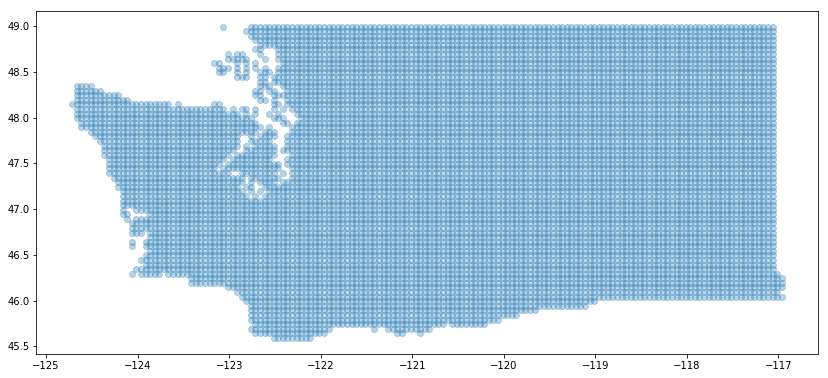

In [18]:
%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

pts = 'WA_02pts.shp'
wa_pt_grid = gpd.read_file(pts)

wa_pt_grid.plot(alpha = .3)



In [13]:
from itertools import combinations
from random import randint
import simplejson
import urllib
from datetime import datetime

%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

#zip lat/long to single column (easier than dealing with shapely geometry)
wa_pt_grid['lat,long'] = list(zip(wa_pt_grid.pts_lat, wa_pt_grid.pts_lon))

#create a list of all coordinates so we can write this to NxN matrix
xytups = wa_pt_grid['lat,long'].tolist()

#find all unique combinations of list entries, removes duplicate geocoding (assuming travel time from A to B = B to A.)
unicombos = [comb for comb in combinations(xytups, 2)]  

print(len(xytups))
print(len(unicombos))
    
#create the similarity matrix
#dmatrix = pd.DataFrame(index = xylist, columns = xylist)

#find all unique combinations of list entries (removes duplicates, assuming travel time from (1, 2) to (3, 4) is equal to travel time from (3, 4) to (1, 2))
#unicombo = [";".join(map(str, comb)) for comb in combinations(xylist, 2)]

#perform the same formatting on the xylist for matching later
#xystring = [",".join(map(str, point)) for point in xylist]

#let's now clean up the combo list (strings) that will work nicely with the Google Distance API
#unicoords = [c.replace('(', '').replace(')', '').replace(' ', '') for c in unicombo]

#now make a pandas dataframe of n x n coordinates from the xystring list
#dfmatrix = pd.DataFrame(index=xystring, columns=xystring)
                        


3726
6939675


Lets try this on something a little smaller. In the code block below, I take the wa_pt_grid point geometry clipped by district and attempt to run the Bing geocoding API in order to build my distance matrix.


808
326028


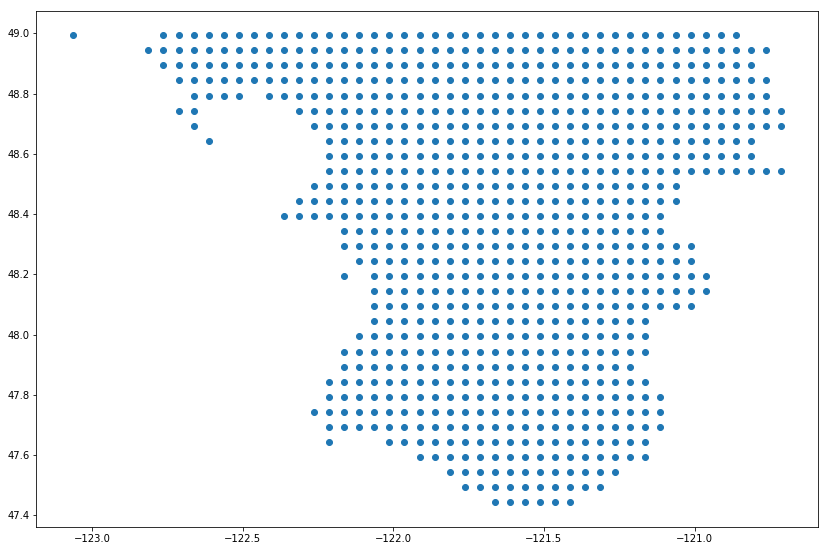

In [19]:
from itertools import combinations
from random import randint
import simplejson
import urllib
from datetime import datetime

%matplotlib inline 
mpl.rcParams['figure.figsize'] = (14,14)

pts = 'Shapes/01/CD01_05pts.shp'
CD01_pt_grid = gpd.read_file(pts)

CD01_pt_grid.plot()

#zip lat/long to single column (easier than dealing with shapely geometry)
CD01_pt_grid['lat,long'] = list(zip(CD01_pt_grid.pts_lat, CD01_pt_grid.pts_lon))

#create a list of all coordinates so we can write this to NxN matrix
xytups = CD01_pt_grid['lat,long'].tolist()

#find all unique combinations of list entries, removes duplicate geocoding (assuming travel time from A to B = B to A.)
unicombos = [comb for comb in combinations(xytups, 2)]  

print(len(xytups))
print(len(unicombos))
    
#create the similarity matrix
#dmatrix = pd.DataFrame(index = xylist, columns = xylist)

#find all unique combinations of list entries (removes duplicates, assuming travel time from (1, 2) to (3, 4) is equal to travel time from (3, 4) to (1, 2))
#unicombo = [";".join(map(str, comb)) for comb in combinations(xylist, 2)]

#perform the same formatting on the xylist for matching later
#xystring = [",".join(map(str, point)) for point in xylist]

#let's now clean up the combo list (strings) that will work nicely with the Google Distance API
#unicoords = [c.replace('(', '').replace(')', '').replace(' ', '') for c in unicombo]

#now make a pandas dataframe of n x n coordinates from the xystring list
#dfmatrix = pd.DataFrame(index=xystring, columns=xystring)'''